Реализованы 2 алгоритма, справляющиеся с разными видами зашумленности изображения. Первый Median Filter, второй Gaussian Filter.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

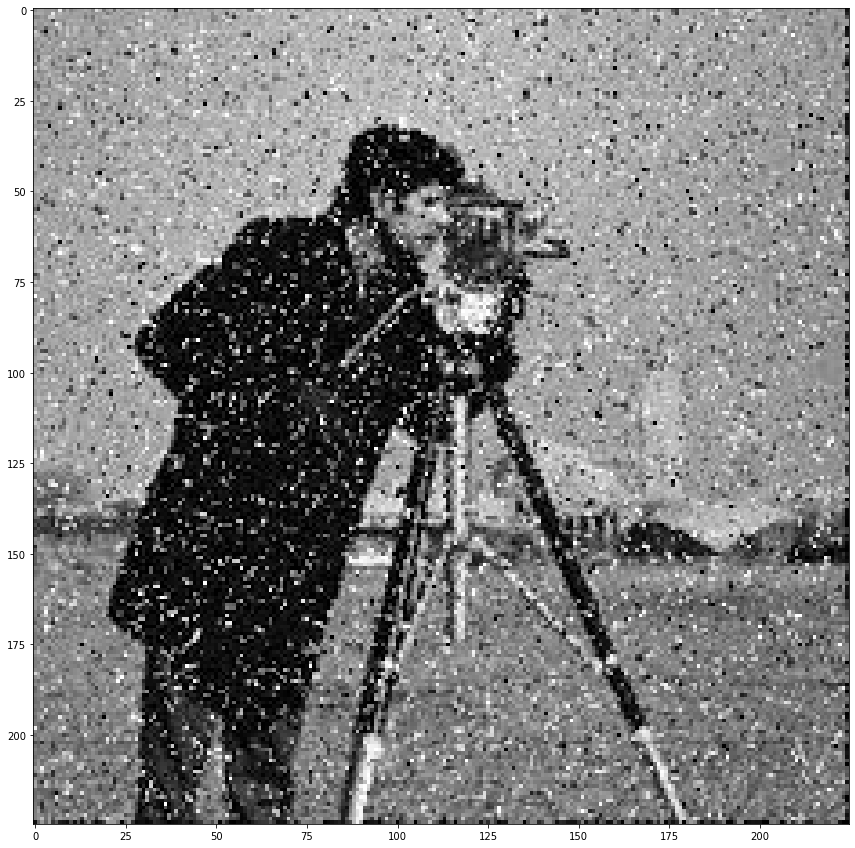

In [2]:
# Выгружаем фотографию
image = cv2.imread('photograph.JPG')
plt.figure(figsize=(15,15)) 
plt.imshow(image)
plt.show()

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # приводим фотографию к 2D array

In [4]:
# MedianFilter, как понятно из названия на выход поступает среднее значение среди всех в матрице определенного размера

def MedianFilter(img, s = 5):
    n, m = img.shape
    indexer = s // 2
    padded_img = np.zeros((img.shape[0] + 2*indexer,img.shape[1] + 2*indexer))
    padded_img[indexer : -indexer, indexer : -indexer] = img

    filtered_img = np.zeros(padded_img.shape)

    for i in range(indexer, n + indexer + 1):
        for j in range(indexer, m + indexer + 1):
            window = padded_img[i - indexer : i + indexer + 1,
                 j - indexer : j + indexer + 1]
            Zij = window[window.shape[0] // 2, window.shape[1] // 2]
            if Zij - np.min(window) > 0 and Zij - np.max(window) < 0:
                value = Zij
            else:
                value = np.median(window)
            filtered_img[i,j] = value

    return filtered_img[indexer : -indexer, indexer : -indexer] 


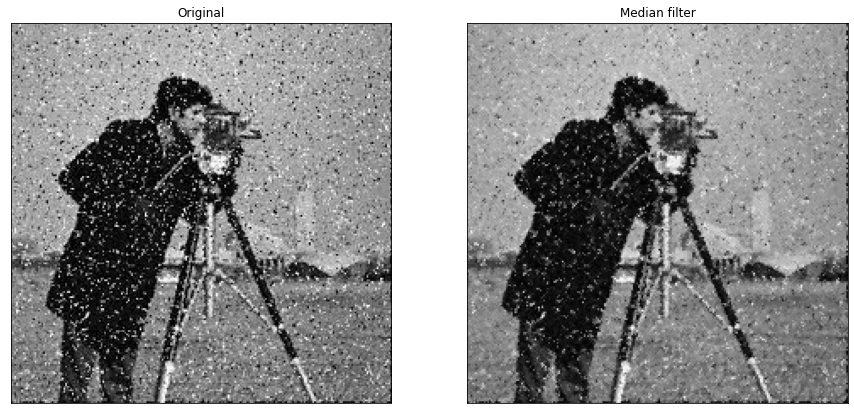

In [5]:
# Для начала испытаем фильтр с размером матрицы 3 в качестве входных данных на картинке плохого качества.

new_image = MedianFilter(image, 3)
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median filter')
plt.xticks([]), plt.yticks([])
plt.show()

# В силу плохого качества не удалось достичь существенного улучшения картинки, тем не менее удалось избавиться от шума соли и перца

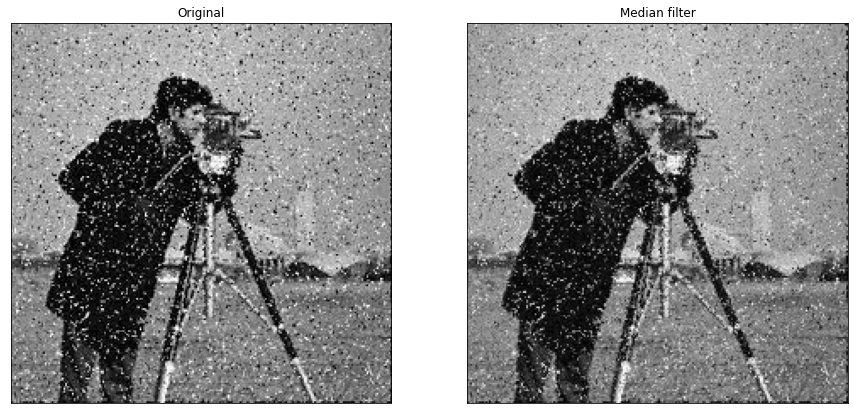

In [6]:
# Возьмем в качестве входных данных для размера матрицы 7 и получим результат даже хуже, чем с 3, в силу низкого качества изображения

new_image = MedianFilter(image, 7)
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
# Выгрузим вторую картинку выского качества

image2 = cv2.imread('woman.PNG')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

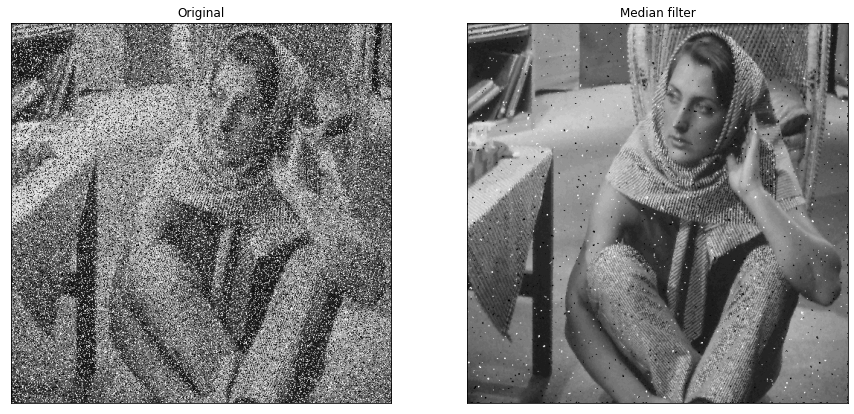

In [8]:
# При использовании фильтра со значением 3 можем заметить существенное улучшение изображения

new_image2 = MedianFilter(image2, 3)
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image2, cmap='gray'),plt.title('Median filter')
plt.xticks([]), plt.yticks([])
plt.show()

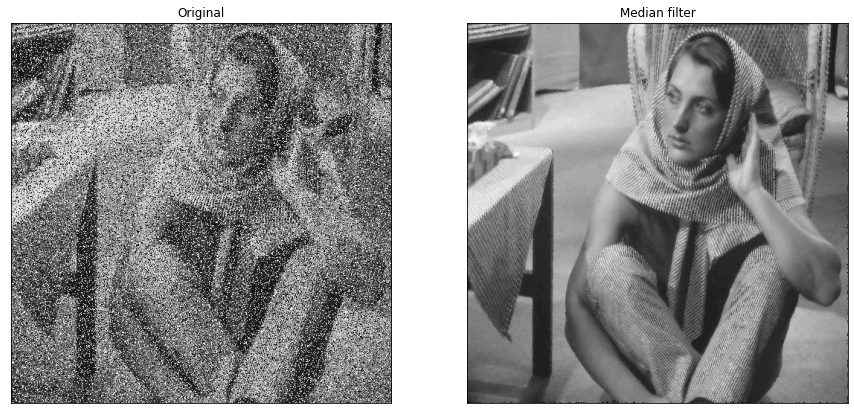

In [9]:
# При использовании фильтра со значением 7 улается полностью избавиться от шума на изображении

new_image2 = MedianFilter(image2, 7)
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image2, cmap='gray'),plt.title('Median filter')
plt.xticks([]), plt.yticks([])
plt.show()

Какой можно сделать вывод из проведенного эксперимента:

Сам по себе медианный фильтр отлично справляется с шумом соли и перца на картинке. При использовании изображения высокого качества логично использовать большее значение для размера матрицы (большое количество пикселей позволяет сохранить качество изображения), в то время как при использовании изображения низкого качества стоит взять меньшее значение для размера матрицы.

In [55]:
# реализация Gaussing Filter

def GaussFilter(image, kernel_size = 1, sigma = 1.5):

    # kernel calculation, вообще был смысл вынести как отдельную функцию. чтобы не пересчитывать Green и Red, но уже реализовал так
    kernel = np.zeros((2 * kernel_size + 1, 2 * kernel_size + 1), np.float32)
    for i in range (2 * kernel_size + 1):
        for j in range (2 * kernel_size + 1):
            norm = math.pow(i - kernel_size, 2) + math.pow(j - kernel_size, 2)
            kernel[i, j] = math.exp(-norm / (2 * math.pow(sigma,2))) / (math.sqrt(2 * math.pi) * math.pow(sigma,2))
    kernel /= np.sum(kernel)
    

    n, m = image.shape
    s1, s2 = kernel.shape
    for i in range(int(s1 / 2), n - int(s1 / 2)):
        for j in range(int(s2 / 2), m - int(s2 / 2)):
            sum_ = 0
            for k in range(0, s1):
                for l in range(0, s2):
                    sum_ += image[i- int(s1 / 2) + k, j - int(s2 / 2) + l] * kernel[k, l]
            image[i, j] = sum_

    return image

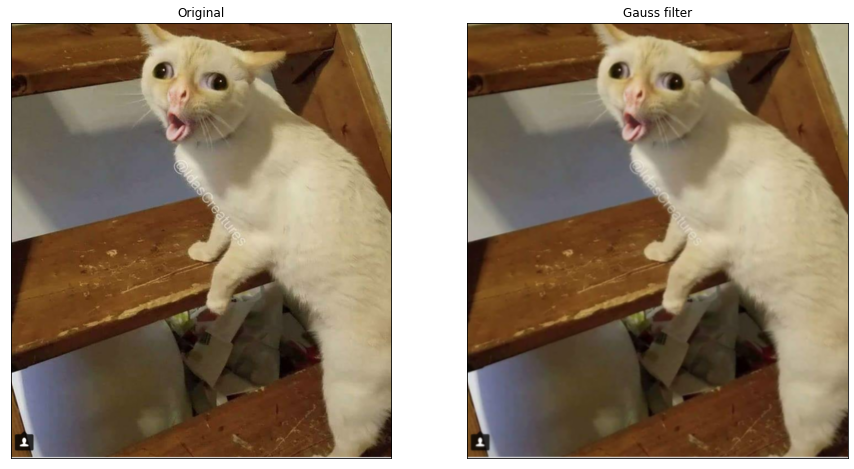

In [56]:
image3 = cv2.imread("cough_cat.png")
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB) # RGB

image3_B, image3_G, image3_R = cv2.split(image3)
image3_gauss_B = GaussFilter(image3_B)
image3_gauss_G = GaussFilter(image3_G)
image3_gauss_R = GaussFilter(image3_R)
new_image3 = cv2.merge([image3_gauss_B, image3_gauss_G, image3_gauss_R])

plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(image3),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image3),plt.title('Gauss filter')
plt.xticks([]), plt.yticks([])
plt.show()

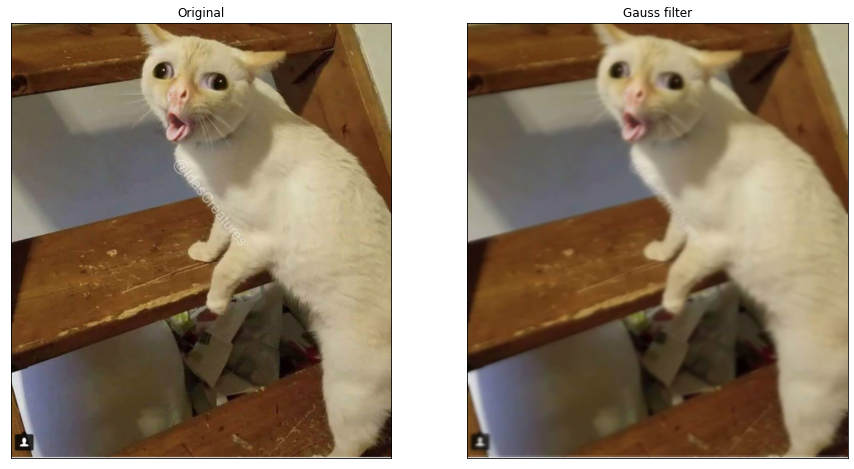

In [57]:
image3_B, image3_G, image3_R = cv2.split(image3)
image3_gauss_B = GaussFilter(image3_B, 3, 10)
image3_gauss_G = GaussFilter(image3_G, 3, 10)
image3_gauss_R = GaussFilter(image3_R, 3, 10)
new_image3_1 = cv2.merge([image3_gauss_B, image3_gauss_G, image3_gauss_R])

plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(image3),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image3_1),plt.title('Gauss filter')
plt.xticks([]), plt.yticks([])
plt.show()

Гауссов фильтр избавляется от шума и сглаживает изображение, основным влияющим фактором является дисперсия при генерации ядра фильтра. Чем больше дисперсия, тем очевиднее эффект сглаживания. Однако существует порог, после превышения которого изображение станет слишком размытым. Если дисперсия слишком мала, эффекта сглаживания не будет. Следовательно для разных изображений следует выбирать соответствующую дисперсию в зависимости от уровня шума, гладкости изображения и других факторов, чтобы добиться наилучшего эффекта.

Основным фактором, влияющим на время работы программы, является размер ядра фильтра. Алгоритм можно ускорить, используя вместо матричных операций операции с векторами-столбцами.